In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython.display import display
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#Task 1
crime_df = pd.read_csv('Crime_Data_from_2020_to_Present.csv',na_values=["-"])
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
811659,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
811660,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
811661,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [3]:
#Task 2
#2.1
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
#2.2
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811663 entries, 0 to 811662
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           811663 non-null  int64  
 1   Date Rptd       811663 non-null  object 
 2   DATE OCC        811663 non-null  object 
 3   TIME OCC        811663 non-null  int64  
 4   AREA            811663 non-null  int64  
 5   AREA NAME       811663 non-null  object 
 6   Rpt Dist No     811663 non-null  int64  
 7   Part 1-2        811663 non-null  int64  
 8   Crm Cd          811663 non-null  int64  
 9   Crm Cd Desc     811663 non-null  object 
 10  Mocodes         699639 non-null  object 
 11  Vict Age        811663 non-null  int64  
 12  Vict Sex        705138 non-null  object 
 13  Vict Descent    705129 non-null  object 
 14  Premis Cd       811654 non-null  float64
 15  Premis Desc     811184 non-null  object 
 16  Weapon Used Cd  282783 non-null  float64
 17  Weapon Des

In [5]:
#2.3
print(crime_df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [6]:
#2.3
crime_df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.116630e+05,811663.000000,811663.000000,811663.000000,811663.000000,811663.000000,811663.000000,811654.000000,282783.000000,811653.000000,59815.000000,2000.000000,60.000000,811663.000000,811663.000000
mean,2.159652e+08,1335.588916,10.712678,1117.690694,1.413998,500.745704,29.828150,305.789181,362.905429,500.483809,957.470099,983.554000,990.766667,33.978513,-118.024077
std,1.077479e+07,654.136069,6.092110,609.205985,0.492548,207.814959,21.769578,216.625659,123.741738,207.603529,111.587116,52.917211,27.912919,1.800082,6.241544
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.101207e+08,900.000000,6.000000,622.000000,1.000000,331.000000,8.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.013600,-118.429600
50%,2.201116e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321500
75%,2.219102e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [7]:
# Task 3
# 3.1 
crime_df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           112024
Vict Age               0
Vict Sex          106525
Vict Descent      106534
Premis Cd              9
Premis Desc          479
Weapon Used Cd    528880
Weapon Desc       528880
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          751848
Crm Cd 3          809663
Crm Cd 4          811603
LOCATION               0
Cross Street      681791
LAT                    0
LON                    0
dtype: int64

In [8]:
# Removing Crm Cd 2, Crm Cd 3, Crm Cd 4, Cross Street columns as more than 60% of them are empty
crime_df.drop(labels=['Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street','Mocodes','Weapon Used Cd', 'Weapon Desc'], axis=1, inplace=True)
# Removing observations where Premis Cd, Premis Desc, Crm Cd 1
crime_df.dropna(subset=['Premis Cd','Premis Desc','Crm Cd 1'], inplace = True)

In [9]:
# Imputation of Nulls
crime_df['Vict Sex'].fillna('X', inplace = True)
crime_df['Vict Descent'].fillna('X', inplace = True)

In [10]:
# 3.2 Duplicates
crime_df[crime_df.duplicated()] # no duplicates

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON


In [11]:
# 3.3 Converting datatypes to datetime
crime_df["Date Rptd"]= crime_df["Date Rptd"].str.replace(' 12:00:00 AM','')
crime_df["DATE OCC"]= crime_df["DATE OCC"].str.replace(' 12:00:00 AM','')

In [12]:
crime_df['Date Rptd'] = pd.to_datetime(crime_df['Date Rptd'], format= '%m/%d/%Y')
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'],format= '%m/%d/%Y')
# Data type conversion (Note- Did not do weapon used cd because of nulls)
crime_df[['Premis Cd','Crm Cd 1']] = crime_df[['Premis Cd','Crm Cd 1']].astype(int)

In [13]:
crime_df['year occured'] = crime_df['DATE OCC'].dt.year
crime_df['month occured'] = crime_df['DATE OCC'].dt.month

In [14]:
crime_df = crime_df.set_index('DATE OCC').sort_index()

In [15]:
crime_df.isnull().sum()

DR_NO            0
Date Rptd        0
TIME OCC         0
AREA             0
AREA NAME        0
Rpt Dist No      0
Part 1-2         0
Crm Cd           0
Crm Cd Desc      0
Vict Age         0
Vict Sex         0
Vict Descent     0
Premis Cd        0
Premis Desc      0
Status           0
Status Desc      0
Crm Cd 1         0
LOCATION         0
LAT              0
LON              0
year occured     0
month occured    0
dtype: int64

In [16]:
crime_df.describe().apply(lambda x:x.apply('{0:.5f}'.format))

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON,year occured,month occured
count,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000,811174.00000
mean,215962775.98888,1335.76277,10.71229,1117.65272,1.41418,500.83356,29.83796,305.74087,500.57336,33.97846,-118.02388,2021.45847,6.22191
std,10774463.96899,654.01393,6.09256,609.25185,0.49258,207.80660,21.76735,216.65888,207.59571,1.80062,6.24342,1.07490,3.33621
min,817.00000,1.00000,1.00000,101.00000,1.00000,110.00000,-3.00000,101.00000,110.00000,0.00000,-118.66760,2020.00000,1.00000
25%,210120655.25000,900.00000,6.00000,622.00000,1.00000,331.00000,8.00000,101.00000,331.00000,34.01360,-118.42960,2021.00000,3.00000
50%,220111477.00000,1415.00000,11.00000,1142.00000,1.00000,442.00000,31.00000,203.00000,442.00000,34.05840,-118.32150,2021.00000,6.00000
75%,221910090.75000,1900.00000,16.00000,1617.00000,2.00000,626.00000,45.00000,501.00000,626.00000,34.16310,-118.27390,2022.00000,9.00000
max,239916487.00000,2359.00000,21.00000,2199.00000,2.00000,956.00000,120.00000,971.00000,956.00000,34.33430,0.00000,2023.00000,12.00000


In [17]:
# Make age a positive number
crime_df['Vict Age'] = crime_df['Vict Age'].abs()

In [18]:
# Replacing H Sex with X
crime_df['Vict Sex']=crime_df['Vict Sex'].replace('H','X')

In [19]:
crime_df.columns

Index(['DR_NO', 'Date Rptd', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status', 'Status Desc',
       'Crm Cd 1', 'LOCATION', 'LAT', 'LON', 'year occured', 'month occured'],
      dtype='object')

## EDA

In [20]:
# 1. Crime Trend 
crime_count = crime_df.groupby(crime_df.index.date).size().reset_index()

In [21]:
crime_count.rename(columns={'index':'Date',0:'crime_count'}, inplace=True)
crime_count['Date']= pd.to_datetime(crime_count['Date'],format='%Y-%m-%d')
crime_count.set_index('Date',inplace=True)

In [22]:
crime_count.head()

,crime_count
Date,
2020-01-01,1103
2020-01-02,526
2020-01-03,595
2020-01-04,540
2020-01-05,505


In [23]:
monthly_crime_count = crime_count.resample('MS').mean()

In [24]:
monthly_crime_count.head()

,crime_count
Date,
2020-01-01,595.838710
2020-02-01,594.620690
2020-03-01,521.000000
2020-04-01,522.366667
2020-05-01,554.419355


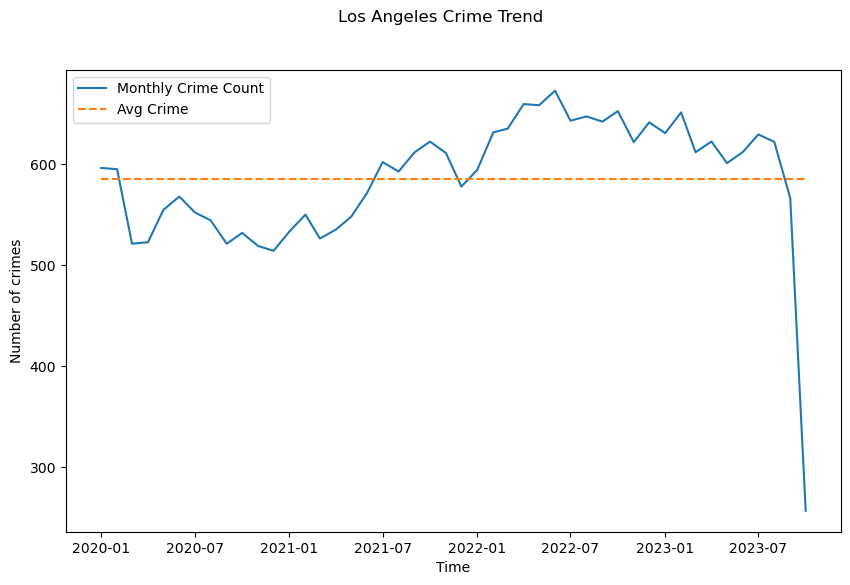

In [25]:
fig, ax = plt.subplots(1,1, figsize= (10,6))
avg = monthly_crime_count['crime_count'].sum()/len(monthly_crime_count)
avg = [avg]*len(monthly_crime_count)

ax.plot(monthly_crime_count, label ='Monthly Crime Count')
ax.plot(monthly_crime_count.index,avg,linestyle= '--', label='Avg Crime')
ax.set_xlabel("Time")
ax.set_ylabel("Number of crimes")
fig.suptitle('Los Angeles Crime Trend')
ax.legend()
plt.show()

In [26]:
# 2. Seasonal Patterns
avg_crimes_per_month = crime_df.groupby(['year occured','month occured']).size().groupby('month occured').mean().reset_index()
avg_crimes_per_month.columns=['month occured','average crimes per month']
avg_crimes_per_month

,month occured,average crimes per month
0,1,18236.750000
1,2,17131.250000
2,3,17771.500000
3,4,17536.000000
4,5,18294.000000
5,6,18170.500000
6,7,18794.000000
7,8,18635.500000
8,9,17548.750000
9,10,14121.000000


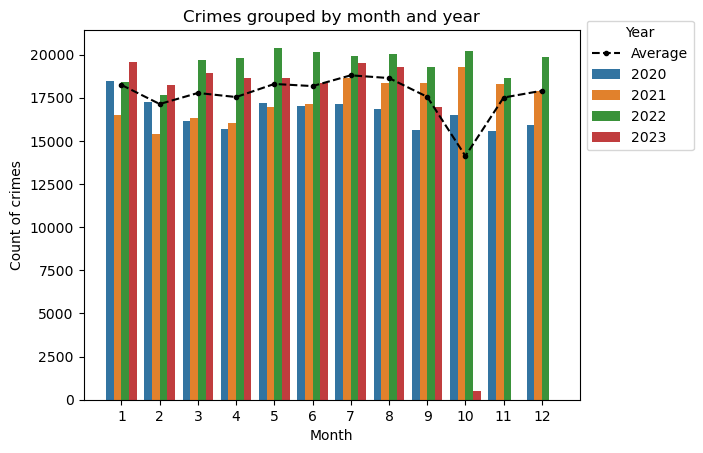

In [27]:
sns.countplot(data=crime_df, x='month occured', hue='year occured')
y=avg_crimes_per_month['average crimes per month']
plt.plot(y, marker='.', color='black', linestyle='--', label='Average')
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.85))
plt.xlabel("Month")
plt.ylabel("Count of crimes")
plt.title("Crimes grouped by month and year")
plt.show()

Crm Cd Desc                                              Crm Cd
VEHICLE - STOLEN                                         510       86814
BATTERY - SIMPLE ASSAULT                                 624       64567
THEFT OF IDENTITY                                        354       51537
BURGLARY FROM VEHICLE                                    330       49807
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)  740       49509
                                                                   ...  
GRAND THEFT / AUTO REPAIR                                349           5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                 906           4
FAILURE TO DISPERSE                                      884           3
DISHONEST EMPLOYEE ATTEMPTED THEFT                       445           2
INCITING A RIOT                                          882           1
Length: 138, dtype: int64


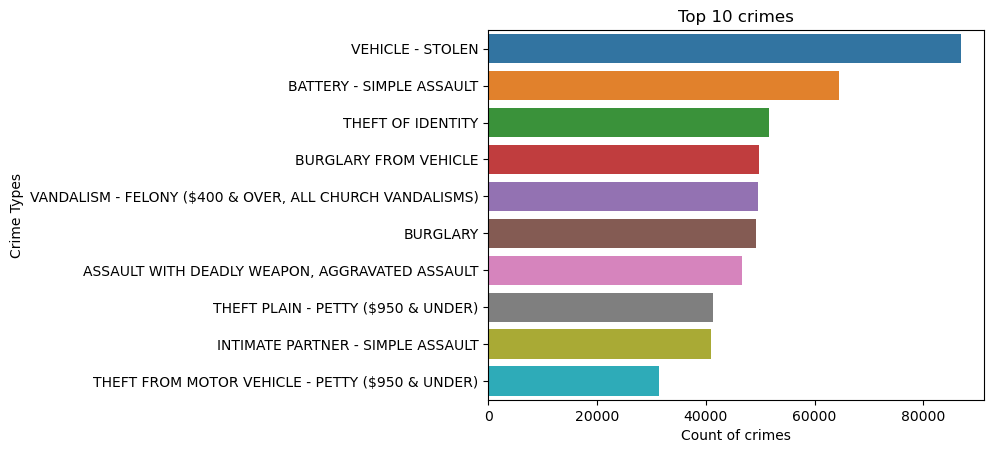

Most common crime type observed is:   VEHICLE - STOLEN    86814
Name: Crm Cd Desc, dtype: int64  


In [28]:
# 3. Common crime type
print(crime_df[['Crm Cd Desc','Crm Cd']].value_counts())
top_crimes=crime_df['Crm Cd Desc'].value_counts().head(10)
sns.countplot(data=crime_df[crime_df['Crm Cd Desc'].isin(top_crimes.index)], y='Crm Cd Desc', order=top_crimes.index)
plt.xlabel("Count of crimes")
plt.ylabel("Crime Types")
plt.title("Top 10 crimes")
plt.show()
print("\033[1mMost common crime type observed is:  " , top_crimes.head(1)," \033[0m")

In [29]:
# Trend over time of vehicle stolen by year
vehicle_stolen = crime_df[crime_df['Crm Cd Desc']=='VEHICLE - STOLEN'].index.value_counts().reset_index()
vehicle_stolen.columns = ['Date', 'crime_count']

In [30]:
vehicle_stolen['Date']= pd.to_datetime(vehicle_stolen['Date'])
vehicle_stolen.set_index('Date',inplace=True)

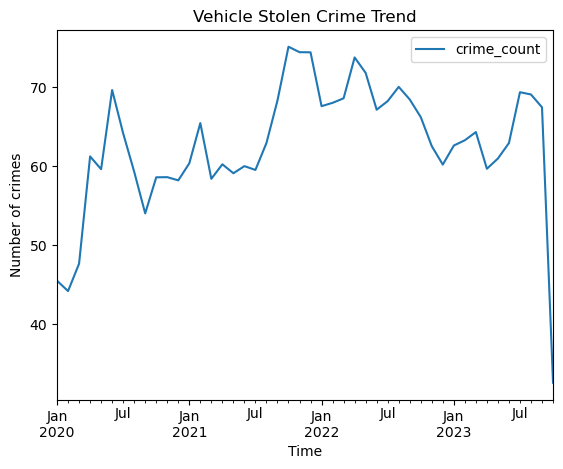

In [31]:
vehicle_stolen.resample('MS').mean().plot(kind='line')
plt.xlabel("Time")
plt.ylabel("Number of crimes")
plt.title('Vehicle Stolen Crime Trend')
plt.show()

In [32]:
# 4. Regional Differences
region_df = crime_df.groupby('AREA NAME')['DR_NO'].count().reset_index()
region_df.columns=['Area','Count']
region_df['Latitude']=crime_df.groupby('AREA NAME')['LAT'].median().reset_index()['LAT']
region_df['Longitude']=crime_df.groupby('AREA NAME')['LON'].median().reset_index()['LON']
region_df


,Area,Count,Latitude,Longitude
0,77th Street,51268,33.9770,-118.2938
1,Central,54530,34.0462,-118.2504
2,Devonshire,32912,34.2480,-118.5361
3,Foothill,27092,34.2530,-118.3933
4,Harbor,33599,33.7768,-118.2884
5,Hollenbeck,30474,34.0506,-118.2061
6,Hollywood,43027,34.0998,-118.3295
7,Mission,32290,34.2394,-118.4517
8,N Hollywood,40310,34.1700,-118.3827
9,Newton,40512,34.0091,-118.2621


In [33]:
heat_m = folium.Map(location=[34.0579, -118.3205], zoom_start=9.9) 
title_html = '<h3 align="center" style="font-size:16px"><b>Crimes Regional Distribution </b></h3>'
heat_m.get_root().html.add_child(folium.Element(title_html))
for crime_col, crime_row in region_df.iterrows():
    folium.CircleMarker(
        location=[crime_row['Latitude'], crime_row['Longitude']],
        radius=crime_row['Count']*0.00075,
        color='yellow',
        fill_color='red',
        fill_opacity=0.3,
    ).add_to(heat_m)

display(heat_m) #show map

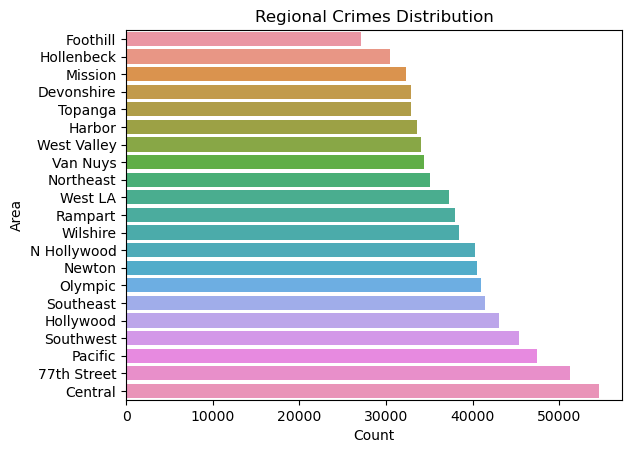

In [34]:
sns.barplot(data=region_df, x='Count', y='Area', order=region_df.sort_values('Count')['Area'])
plt.title("Regional Crimes Distribution")
plt.show()

In [35]:
# 5. Correlation with economic factors
''' Economic Data Sources:
    https://data.census.gov/profile/Los_Angeles_County,_California?g=050XX00US06037#housing
    
    https://laist.com/news/housing-homelessness/homelessness-la-county-los-angeles-homeless-count-lahsa-numbers
    
    chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://dot.ca.gov/-/media/dot-media/programs/
    transportation-planning/documents/data-analytics-services/transportation-economics/socioeconomic-forecasts/2020/2020-pdf/los-angeles-2020-a11y.pdf
'''

yearly_economic_data_la = pd.DataFrame({'year1':['2020','2021','2022','2023'],
                                       'mean_income':[112834,106931,120272,129000],
                                       'median_income':[76367,69778,82516,98200],
                                       'emmigration':[20259,40786,33235,30200],
                                       'homeless':[66436,80436,81235,75518],
                                       'unemployement_rate':[6.1,6,4.2,5.1],
                                       'inflation':[1.2,3.8,7.4,3.8]})
yearly_economic_data_la

,year1,mean_income,median_income,emmigration,homeless,unemployement_rate,inflation
0,2020,112834,76367,20259,66436,6.1,1.2
1,2021,106931,69778,40786,80436,6.0,3.8
2,2022,120272,82516,33235,81235,4.2,7.4
3,2023,129000,98200,30200,75518,5.1,3.8


In [36]:
yearly_crime = crime_count.resample('Y').sum().reset_index()
yearly_crime.columns = ['year','crime_count']
yearly_crime['year']=yearly_crime['year'].dt.year
yearly_crime

,year,crime_count
0,2020,199322
1,2021,209232
2,2022,234022
3,2023,168598


In [37]:
economic_crime_data = pd.concat([yearly_crime,yearly_economic_data_la],axis = 1)
economic_crime_data.drop('year1',axis=1,inplace=True)
economic_crime_data['crime_rate']= (economic_crime_data['crime_count']/economic_crime_data['crime_count'].sum())*10
economic_crime_data

,year,crime_count,mean_income,median_income,emmigration,homeless,unemployement_rate,inflation,crime_rate
0,2020,199322,112834,76367,20259,66436,6.1,1.2,2.457204
1,2021,209232,106931,69778,40786,80436,6.0,3.8,2.579373
2,2022,234022,120272,82516,33235,81235,4.2,7.4,2.884979
3,2023,168598,129000,98200,30200,75518,5.1,3.8,2.078444


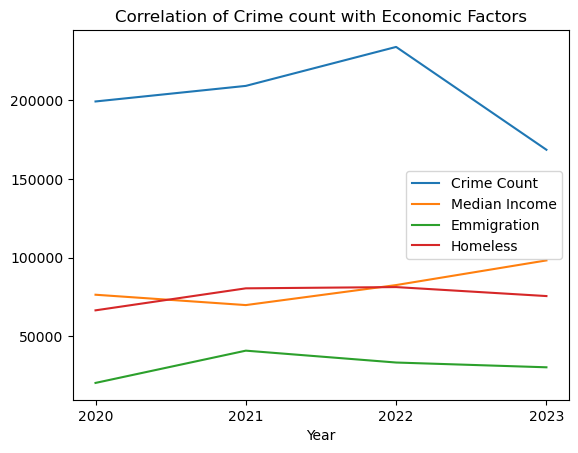

In [38]:
fig, ax = plt.subplots(1,1)
ax.plot(economic_crime_data['year'],economic_crime_data['crime_count'],label = 'Crime Count')
ax.plot(economic_crime_data['year'],economic_crime_data['median_income'], label = 'Median Income')
ax.plot(economic_crime_data['year'],economic_crime_data['emmigration'], label = 'Emmigration')
ax.plot(economic_crime_data['year'],economic_crime_data['homeless'], label = 'Homeless')
ax.set_xlabel("Year")
ax.set_xticks(economic_crime_data['year'])
ax.set_xticklabels(economic_crime_data['year'])
ax.legend()
plt.title("Correlation of Crime count with Economic Factors")
plt.show()

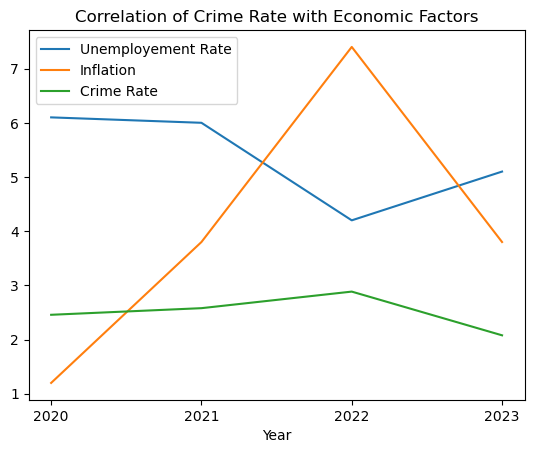

In [39]:
fig, ax = plt.subplots(1,1)
ax.plot(economic_crime_data['year'],economic_crime_data['unemployement_rate'],label = 'Unemployement Rate')
ax.plot(economic_crime_data['year'],economic_crime_data['inflation'], label = 'Inflation')
ax.plot(economic_crime_data['year'],economic_crime_data['crime_rate'], label = 'Crime Rate')
ax.set_xlabel("Year")
ax.set_xticks(economic_crime_data['year'])
ax.set_xticklabels(economic_crime_data['year'])
ax.legend()
plt.title("Correlation of Crime Rate with Economic Factors")
plt.show()

In [40]:
# 6.Day of week:
dup = crime_df.reset_index()
dup['Day of Week'] = dup['DATE OCC'].dt.day_name()
crimes_DOW = dup.groupby(['year occured','Day of Week']).size().groupby('Day of Week').mean().reset_index()
crimes_DOW.columns=['Day','Average crimes per day of week']
crimes_DOW

,Day,Average crimes per day of week
0,Friday,30940.75
1,Monday,28725.75
2,Saturday,29631.75
3,Sunday,28275.50
4,Thursday,28616.50
5,Tuesday,27799.50
6,Wednesday,28803.75


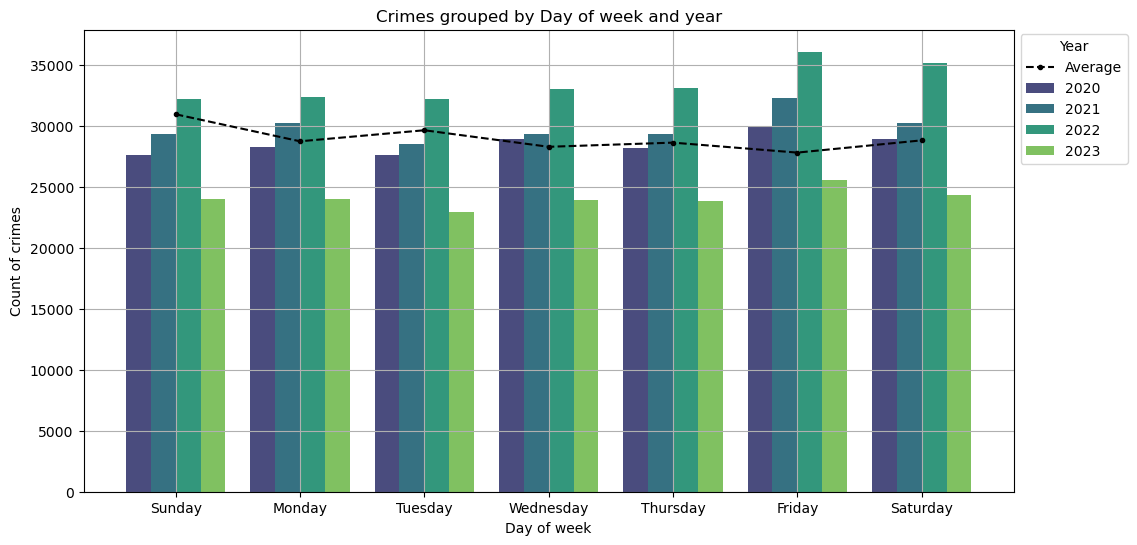

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dup, x='Day of Week', hue='year occured', palette='viridis',
              order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
y=crimes_DOW['Average crimes per day of week']
plt.plot(y, marker='.', color='black', linestyle='--', label='Average')
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.85))
plt.grid()
plt.xlabel("Day of week")
plt.ylabel("Count of crimes")
plt.title("Crimes grouped by Day of week and year")
plt.show()

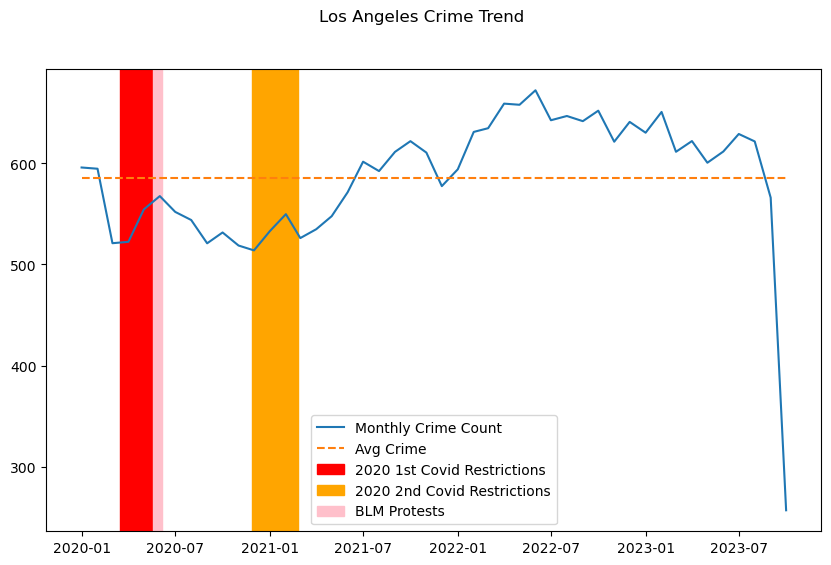

In [42]:
# 7. Impact of major event
# Policy change effects
fig, ax = plt.subplots(1,1, figsize= (10,6))

avg = monthly_crime_count['crime_count'].sum()/len(monthly_crime_count)
avg = [avg]*len(monthly_crime_count)

ax.plot(monthly_crime_count, label ='Monthly Crime Count')
ax.plot(monthly_crime_count.index,avg,linestyle= '--', label='Avg Crime')
ax.axvspan(xmin='2020-03-16',xmax='2020-05-18',color='red',label='2020 1st Covid Restrictions')
ax.axvspan(xmin='2020-11-27',xmax='2021-02-25',color='orange',label='2020 2nd Covid Restrictions')
ax.axvspan(xmin='2020-05-18',xmax='2020-06-06',color='pink',label='BLM Protests')
fig.suptitle('Los Angeles Crime Trend')
ax.legend()
plt.show()

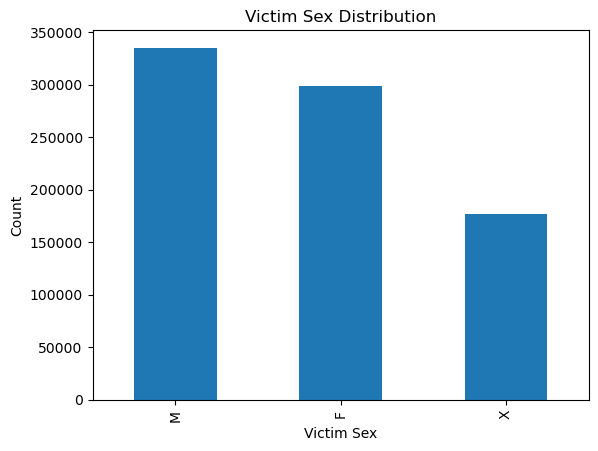

In [43]:
# 8. Outlier and unusual patterns
crime_df['Vict Sex'].value_counts().plot(kind = 'bar')
plt.title("Victim Sex Distribution")
plt.xlabel("Victim Sex")
plt.ylabel("Count")
plt.show()

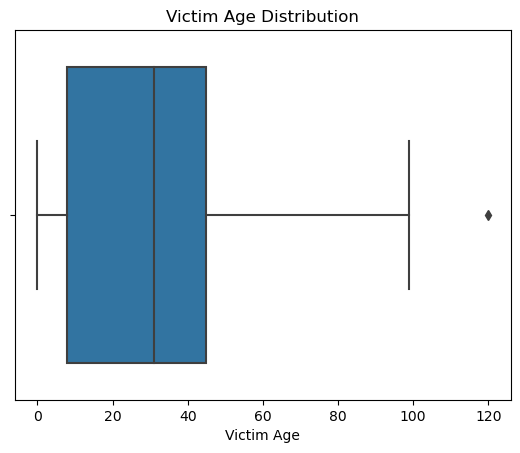

In [44]:
sns.boxplot(data=crime_df, x='Vict Age')
plt.title("Victim Age Distribution")
plt.xlabel("Victim Age")
plt.show()

In [45]:
# 9. Demographic Factors

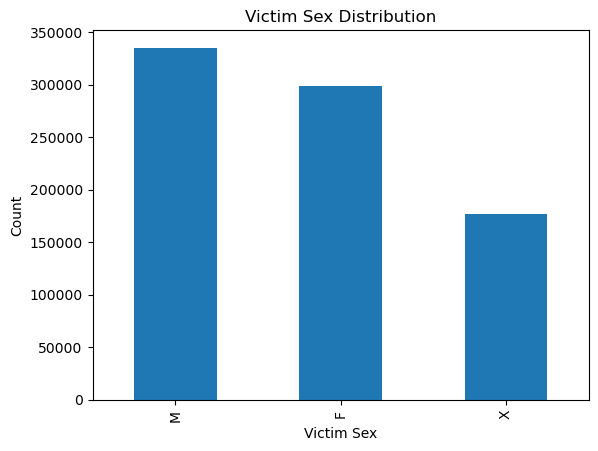

In [46]:
crime_df['Vict Sex'].value_counts().plot(kind = 'bar') # Male Victims > Female
plt.title("Victim Sex Distribution")
plt.xlabel("Victim Sex")
plt.ylabel("Count")
plt.show()

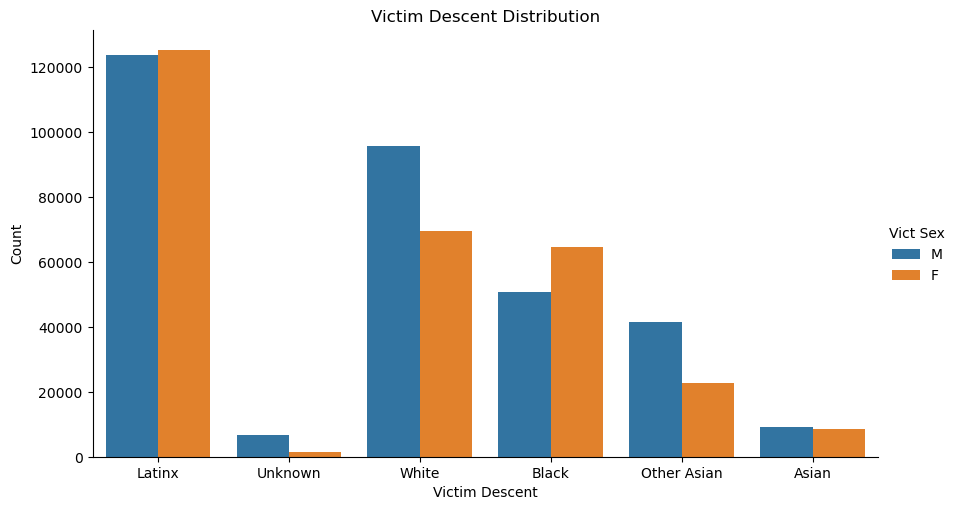

In [47]:
a = sns.catplot(data=crime_df,x='Vict Descent', hue = 'Vict Sex',kind = 'count', height=5, aspect=1.8,
           hue_order=crime_df['Vict Sex'].value_counts()[0:2].index,
           order=crime_df['Vict Descent'].value_counts(ascending=False)[0:6].index)
a.set_xticklabels(['Latinx','Unknown','White','Black','Other Asian','Asian'])
plt.title("Victim Descent Distribution")
plt.xlabel("Victim Descent")
plt.ylabel("Count")
plt.show()

In [48]:
crime_df['Vict Descent'].value_counts(ascending=False)[0:6]

H    249048
X    184269
W    165562
B    115738
O     64274
A     17766
Name: Vict Descent, dtype: int64

In [49]:
# Analysing Victim Descent

descent_count = crime_df['Vict Descent'].value_counts()
descent_prop = descent_count/descent_count.sum()
descent_prop

H    0.307022
X    0.227163
W    0.204102
B    0.142680
O    0.079236
A    0.021902
K    0.005313
F    0.004166
C    0.003817
J    0.001393
V    0.001027
I    0.000946
Z    0.000504
P    0.000268
U    0.000205
D    0.000074
G    0.000069
L    0.000060
S    0.000055
Name: Vict Descent, dtype: float64

In [50]:
finalised_categories = descent_prop[descent_prop>0.1] # selecting only categories that have prop > 0.1
finalised_categories['Other']= descent_prop[descent_prop<=0.1].sum()

In [51]:
desc_legend = {'H': 'Hispanic', 'W': 'White', 'B': 'Black', 'O': 'Other', 'A': 'Asian', 
               'F': 'Pacific Islander', 'K': 'Korean', 'C': 'Chinese', 'U': 'Unknown', 
               'I': 'American Indian', 'J': 'Japanese', 'P': 'Filipino', 'V': 'Vietnamese', 
               'Z': 'Asian Indian', 'G': 'Guamanian', 'S': 'Samoan', 'D': 'Cambodian', 
               'L': 'Laotian', 'X': 'Other Asian', 'R': 'Other Pacific Islander'}
lab = [desc_legend[i] if i in desc_legend.keys() else i for i in finalised_categories.index.values]

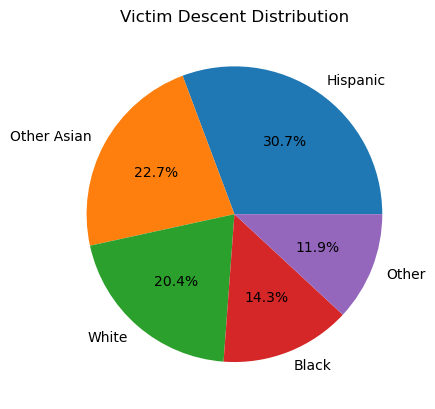

In [52]:
plt.pie(finalised_categories,labels=lab, autopct='%1.1f%%')
plt.title("Victim Descent Distribution")
plt.show()

## Modelling

In [53]:
monthly_crime_count.head()

,crime_count
Date,
2020-01-01,595.838710
2020-02-01,594.620690
2020-03-01,521.000000
2020-04-01,522.366667
2020-05-01,554.419355


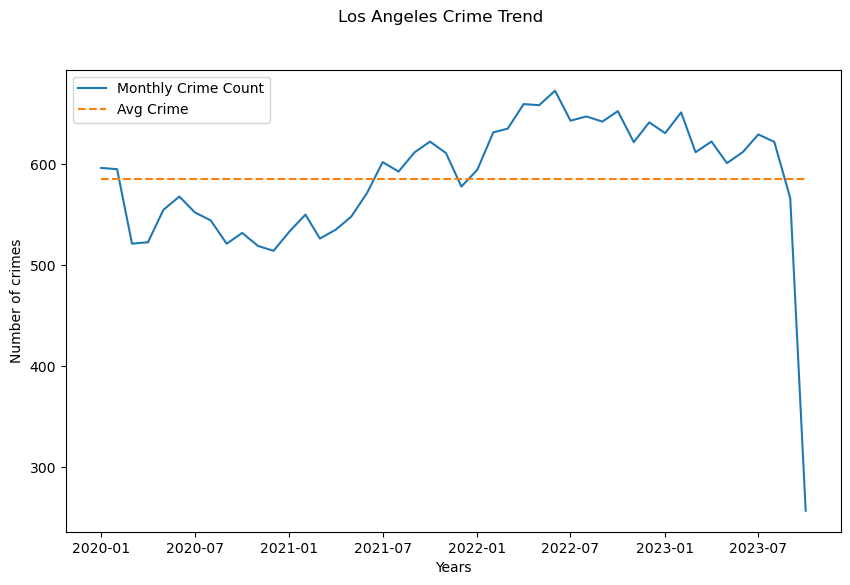

In [54]:
fig, ax = plt.subplots(1,1, figsize= (10,6))
avg = monthly_crime_count['crime_count'].sum()/len(monthly_crime_count)
avg = [avg]*len(monthly_crime_count)

ax.plot(monthly_crime_count, label ='Monthly Crime Count')
ax.plot(monthly_crime_count.index,avg,linestyle= '--', label='Avg Crime')
ax.set_xlabel("Years")
ax.set_ylabel("Number of crimes")
fig.suptitle('Los Angeles Crime Trend')
ax.legend()
plt.show()

In [55]:
# Rolling average to check whether the mean is staying stationary 
roll_mean = monthly_crime_count.rolling(window = 4, center = False).mean()

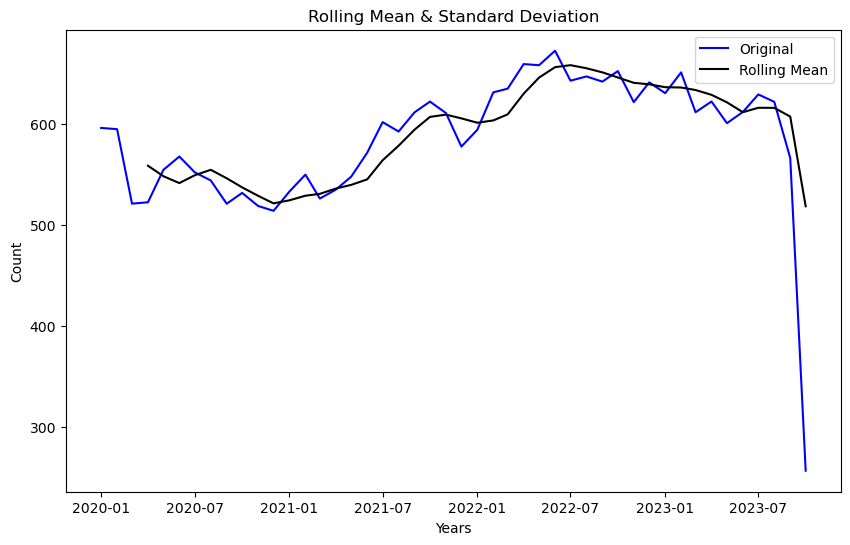

In [56]:
fig = plt.figure(figsize=(10,6))
plt.plot(monthly_crime_count, color='blue', label='Original')
plt.plot(roll_mean, color='black', label='Rolling Mean')
plt.xlabel("Years")
plt.ylabel("Count")
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

So we can see mean is not constant

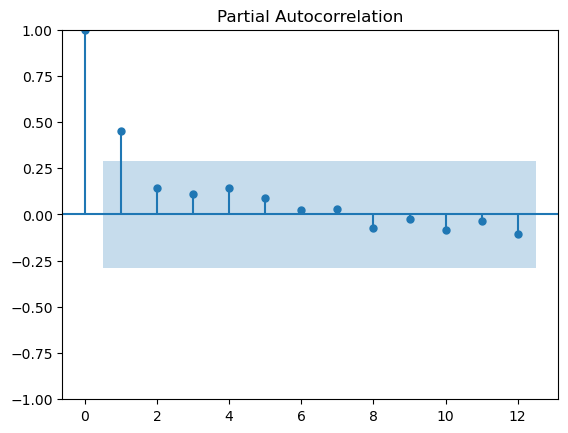

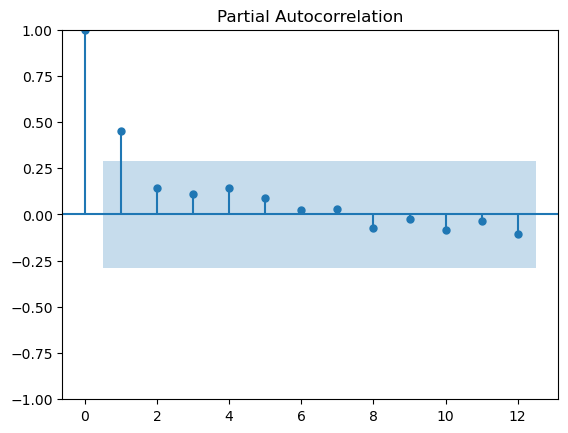

In [57]:
# Checking partial auto correlation
plot_pacf(monthly_crime_count,lags=12)

In [58]:
arima = ARIMA(monthly_crime_count, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_fit = arima.fit()
arima_fit.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      crime_count   No. Observations:                   46
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -181.006
Date:                          Fri, 01 Mar 2024   AIC                            372.011
Time:                                  14:12:19   BIC                            379.494
Sample:                              01-01-2020   HQIC                           374.529
                                   - 10-01-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7519      0.911      0.825      0.409      -1.034       2.538
ma.L1          0.0111      1.066      0.010      0.992      -2.078       2.100
ar.S.L12      -0.6225      3.801     -0.164      0.870      -8.072       6.827
ma.S.L12       0.3406      4.761      0.072      0.943      -8.991       9.673
sigma2      3158.6407   1369.848      2.306      0.021     473.789    5843.492
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               266.82
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               9.75   Skew:                            -3.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
monthly_crime_count.head()

,crime_count
Date,
2020-01-01,595.838710
2020-02-01,594.620690
2020-03-01,521.000000
2020-04-01,522.366667
2020-05-01,554.419355


In [60]:
monthly_crime_count.tail()

,crime_count
Date,
2023-06-01,611.633333
2023-07-01,628.967742
2023-08-01,621.612903
2023-09-01,566.033333
2023-10-01,257.000000


In [61]:
X = monthly_crime_count.index
y = monthly_crime_count['crime_count']

train = monthly_crime_count.loc['2020-01-01':'2022-12-31']
test = monthly_crime_count.loc['2023-01-01' : ]

X_train, X_test = train.index , test.index
y_train, y_test = train['crime_count'] , test['crime_count']

In [62]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [63]:
# Gridsearch to find best parameters

ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =547.7144534560579
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =350.0540130251435


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =173.4939420791148
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =261.35489769776245


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =130.24265378322116
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =6.0
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =130.4749828643604
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =4.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =6.0
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =258.9589799447501


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =236.56599011987763


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =120.4981633699417
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =141.8009179098159


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =132.29758841626403
ARIMA (0, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =4.0
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =6.0
ARIMA (0, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =120.5795498419265


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =122.57955147244884


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =110.6514231733012
ARIMA (0, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\sta

ARIMA (0, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =8.0
ARIMA (0, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =491.5418809122257


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =310.91807593540335


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =149.98315548953502
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =235.10065427194158


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =113.38168626416108
ARIMA (0, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =113.60596338233098


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =247.26476871239112


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =212.36594832602944


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =109.1685502222129
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =134.83097650507102


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =115.33603731867079


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =119.26818502536791


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =120.48145510662444


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =102.07777133789013
ARIMA (0, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


ARIMA (0, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =480.6033096488385
ARIMA (0, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =277.53714723469545


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =138.67590341640374
ARIMA (0, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =211.55422509225997
ARIMA (0, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =95.72078823434123


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =98.9791605426518


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =237.22965796029263


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =215.60363963283083


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =102.67104568910884
ARIMA (0, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =126.00849946662157


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =97.95864853225392


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (0, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (0, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =122.01148162124669


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =123.15042149147503


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =92.02406367564146


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =12.0
ARIMA (0, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =310.32853439224357
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =198.3925437728675


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =91.94145519297884
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =210.58803666715949
ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =97.94601518273939


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =6.0
ARIMA (0, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =108.11283225185016


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =4.0
ARIMA (0, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =6.0
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =205.93160333122907
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =198.4689215011589


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =93.46483845591186
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =107.46893174710866


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =99.93892408622457
ARIMA (0, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =4.0
ARIMA (0, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (0, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =103.13044454975189


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =105.13044455300766


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =94.64075643758554


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =291.7826331347728
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =190.69048472033128


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =84.04636625135457
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =200.71526822653422


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =87.01064608330188


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =8.0
ARIMA (0, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =100.18311440739092


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =207.81564553362597


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =190.50621917557876


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =85.78563918916612
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =109.33391176295501


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =86.19594682423337
ARIMA (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =104.74822485758105


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =106.74207527892409


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =87.33442666805773
ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (0, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =286.0426702702082


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =184.66563125543655
ARIMA (0, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =75.72885258427195
ARIMA (0, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =193.92288997490937


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =76.07762766223216


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =91.4315289259348
ARIMA (0, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =209.3653825992563


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =184.1586887996738


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =77.15129025764635
ARIMA (0, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =110.86826425568246


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =72.19246410245154


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (0, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (0, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =104.56008787155709


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =105.6526811195037


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =68.3949425089984


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (0, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =319.94285330087996
ARIMA (0, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =204.86005185910102


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =93.62315033022973
ARIMA (0, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =213.54981963420843


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =93.28137735406183
ARIMA (0, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =6.0
ARIMA (0, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =104.23465479456645
ARIMA (0, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =6.0
ARIMA (0, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =213.76235791739552


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =204.08627612552465


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =95.12746427019196
ARIMA (0, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =102.28625696248339


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =94.62392448452343
ARIMA (0, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =4.0
ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =99.03463016855997


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =101.03463016881791


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =94.42834850605749
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =290.9034052863832


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =183.90528120238048


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =81.10585042061024
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =195.67179356095966
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =82.97912936516813
ARIMA (0, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =91.30248154100906
ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =201.76547418678547


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =185.3838325341248


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =81.94553067941449
ARIMA (0, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =102.52871727962656


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =85.36479587914611


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =97.42434390373279


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =96.37665966078839


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =83.80493662299318
ARIMA (0, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (0, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =279.1681397345242


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =177.62948699344585
ARIMA (0, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =71.79414992159201
ARIMA (0, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =186.90457906055758


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =73.46136713913005


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =82.71762065403065
ARIMA (0, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (0, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =203.62917902440356


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =177.9153793285335


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =71.89592454224828
ARIMA (0, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =104.2191469036892


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =69.35749582530508


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (0, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =94.5967109050693


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =95.43686164534172


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =72.98318108691065


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =320.3232497442227


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =207.8178830772631


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =105.05063259231888
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =220.5376392873232


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =109.46312644990277
ARIMA (1, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =8.0
ARIMA (1, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =117.55041517311982


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =219.43893693026968


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =207.28580815068824


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =106.98383817297334
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =109.46302260935667


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =111.30574208452393
ARIMA (1, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =6.0
ARIMA (1, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =104.25002218978919


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =106.25002214776606


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =108.250022147456
ARIMA (1, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =314.17287487735877


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =201.0144074120136


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =93.66595969210499
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =213.8098879950689


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =101.87709654174745
ARIMA (1, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =109.6317904423042


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =221.4296377823107


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =198.99083193085224


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =95.4938395411564
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =111.38975572791722


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =103.30674605441862


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =106.0024198473157


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =108.00260442765052


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =97.03039510888085
ARIMA (1, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (1, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =294.5091310997639


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =193.31890288573734


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =85.60575765703271
ARIMA (1, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =203.72261718452606


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =89.85647618742017


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =101.33503234322032


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =222.7477256618466


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =193.4159827787967


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =86.64094273874251
ARIMA (1, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =113.94793499218576


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =85.71297538112375


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (1, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =106.33161498555431


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =108.30195961371149


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =81.9720152690839
ARIMA (1, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =16.0
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =312.31775777972854
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =200.2357852283746


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =92.42205694260322
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =212.5589660072275


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =99.67987710826387
ARIMA (1, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =8.0
ARIMA (1, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =109.96748162428969
ARIMA (1, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =199.25368863059725


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =199.09347755036535


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =93.9549209831188
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =99.62375379629815


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =101.55190115769452


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =91.93465216886496


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =93.93465219270058


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =95.93465219271611
ARIMA (1, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =293.62261534607427


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =191.3999277759012
ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =84.73142943043123
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =201.88739540100312


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =87.05071359096658


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =99.99670751993547


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =200.2867346981011


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =189.10522851384715


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =85.67305026112795
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =101.38993529585225


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =86.0829569597779


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =88.89857782199283


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =90.89859995291336


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =85.13880436217198
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (1, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =288.0404071276954


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =185.83637885136255


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =72.08946024166013
ARIMA (1, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =193.46850376985395


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =77.96178272892685


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =90.53856024388605


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =198.64368645775366


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =182.72013873029968


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =74.07447822257751
ARIMA (1, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =102.57048907234673


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =71.76846014699896
ARIMA (1, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (1, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =85.60487127913116


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =86.59749768913623


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =70.3766403255297


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =16.0
ARIMA (1, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =313.78287729395953
ARIMA (1, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =198.63542120695308


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =84.28778113295593
ARIMA (1, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =207.85786487645615
ARIMA (1, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =92.82707936565387


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =8.0
ARIMA (1, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =100.44396925367283
ARIMA (1, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =6.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =8.0
ARIMA (1, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =196.8583639106407


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =196.15185314499786


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =86.20852908552858
ARIMA (1, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =92.8276882241511
ARIMA (1, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =94.31466031248395


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =6.0
ARIMA (1, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =84.10858695692203


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =86.10858696109499


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =88.10858696109338
ARIMA (1, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =294.3671909208697
ARIMA (1, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =185.75708517778529


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters e

ARIMA (1, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =78.4074155139827
ARIMA (1, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =197.66740323651223
ARIMA (1, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =85.57118306735038


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =91.84755433313076
ARIMA (1, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (1, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =193.41532490357974


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =186.0755965344993


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =80.35200285136236
ARIMA (1, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =94.41460116910712


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =87.54560034477623


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =90.97414721620622


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =88.16859524455111


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =79.70888263133946
ARIMA (1, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (1, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =278.7056366895


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =178.49924040292336


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =69.93625109168087
ARIMA (1, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =186.68599164554828


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =73.02602991387535


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =82.17312336583785
ARIMA (1, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (1, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =194.64836614876157


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =179.10571495933561


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =71.93435833490251
ARIMA (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =95.47198959979482


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =69.45586703909382


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =14.0
ARIMA (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =84.32030776664655


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =85.8965342773191


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =73.59483404659761
ARIMA (1, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =16.0
ARIMA (2, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =314.2475259861388


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =209.58124916023766


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =106.54334696615986
ARIMA (2, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =213.78531369167672


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =111.12020141399209


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (2, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =109.60030022029525


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (2, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =212.2401236458766


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =198.99092527312538


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =108.50890600047559
ARIMA (2, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =101.59884589160458


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =103.35266252378433


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =87.09904706683314


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =95.67575475800086


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =97.67575515736699
ARIMA (2, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =309.86154632162544


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =201.425540734011


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =94.23627632800563
ARIMA (2, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =216.23109911104774


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =100.8970859100162


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =109.9537430311324


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =214.0994916034979


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =199.98362598934008


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =96.08058716413541
ARIMA (2, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =102.83102694815341


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =104.54853002534149


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =88.8162446257729


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =96.38547002103309


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =92.717409775038
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =16.0
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =296.5086123904309


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =195.13446693083043


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =84.78142881032322
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =203.3169483143974


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =86.3946002039279


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =102.22767926976542


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =213.22973683531345


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =192.8768265032565


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =85.87801574415752


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =96.29598066897353


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =87.62211245605447
ARIMA (2, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =95.31032290345814


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =99.46213436346491


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =90.77524121014574
ARIMA (2, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =18.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =18.0
ARIMA (2, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =292.6500844203068
ARIMA (2, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =202.22269740018174


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =89.583627416894
ARIMA (2, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =202.22711668422818


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =98.98340223776951


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (2, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =100.83432339746358


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =8.0
ARIMA (2, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (2, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =192.5636741959145


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =191.4083869542893


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =91.5116643239289
ARIMA (2, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =84.1367716231441


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =84.93622950509307


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =81.3641212847826


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =83.364121284636


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =85.3641212846328
ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =295.59570462181654


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =193.09015164895058


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =80.79998008203918
ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =202.91250812915666


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =88.3569192537937


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =100.8734829236271
ARIMA (2, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =193.16112878816398


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =191.0652986167814


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =86.08318111111714
ARIMA (2, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =84.41198714935302


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =85.8305994998174


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =80.63435007176872


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =82.31969562340339


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =84.3196858164981


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =288.97941777115716
ARIMA (2, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =185.01692295885059


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =75.2287855340606
ARIMA (2, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =192.21269423807794


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =78.24558153789536


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =92.25484771600873


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =191.53873488058434


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =184.13986988101746


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =77.21872923324969
ARIMA (2, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =85.15318528688411


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =73.46976751506205
ARIMA (2, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =16.0
ARIMA (2, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =81.16766813346217


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =83.16657114393414
ARIMA (2, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =72.20586172314873


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =18.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =18.0
ARIMA (2, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =300.94584425989007
ARIMA (2, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =199.7426112008866


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =86.21865627269518
ARIMA (2, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =200.54566403756587


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =94.73901913339802


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =10.0
ARIMA (2, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =92.62500301721718


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =10.0
ARIMA (2, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =190.58850721117855


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =189.64347785418272


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =88.17228301759316
ARIMA (2, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =82.81951505696387


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =87.584434434516


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =8.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =78.14371512786326


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =80.14371513363801


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =82.14371513362569


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =288.9691063433701


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =187.743362293105


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =77.82227283337083
ARIMA (2, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =202.23008299499656


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =84.97587590039629


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =93.31010767485994


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =12.0
ARIMA (2, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =187.64268701031153


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =188.03355793331627


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =79.70190108243152
ARIMA (2, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =82.67154245177221


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =82.87318803605315
ARIMA (2, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =10.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =77.70062800338724


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =80.68997096600032


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =82.68993707428828
ARIMA (2, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =16.0
ARIMA (2, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =279.6312142599124


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =180.36914807004908


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =70.89610128127737
ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =187.46173431675797


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =74.0317025623022


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =10.0
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =14.0
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =188.91958149191524


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =180.95526893630114


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =72.88832000425043
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =88.11406423955111


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =68.08017888340898
ARIMA (2, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =12.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =78.44875675682796
ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =81.02799740786494


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =74.5315643922876


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =18.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =14.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =16.0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (2, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =18.0


In [64]:
# best parameters
best_param = pd.DataFrame(ans,columns=['pdq','pdqs','aic'])
best_param.loc[best_param['aic'].idxmin()]

pdq         (0, 0, 0)
pdqs    (0, 2, 1, 12)
aic               4.0
Name: 7, dtype: object

In [65]:
sarimax = sm.tsa.statespace.SARIMAX(y_train,
                                   order=(0,0,0),
                                   seasonal_order=(0,2,1,12))
model = sarimax.fit()
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                crime_count   No. Observations:                   36
Model:             SARIMAX(0, 2, [1], 12)   Log Likelihood                 -70.493
Date:                    Fri, 01 Mar 2024   AIC                            144.987
Time:                            14:16:49   BIC                            145.956
Sample:                        01-01-2020   HQIC                           144.628
                             - 12-01-2022                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9573    374.206     -0.003      0.998    -734.388     732.474
sigma2      3987.2828   1.49e+06      0.003      0.998   -2.92e+06    2.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.22   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.00   Prob(JB):                         0.50
Heteroskedasticity (H):               0.27   Skew:                            -0.25
Prob(H) (two-sided):                  0.24   Kurtosis:                         1.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
prediction = model.get_prediction(start='2023-01-01', end = '2023-10-01',dynamic=False)
prediction_confidence_int = prediction.conf_int()
prediction_confidence_int

,lower crime_count,upper crime_count
2023-01-01,445.989549,742.648496
2023-02-01,501.976751,798.635698
2023-03-01,544.006842,840.665789
2023-04-01,579.720467,876.379414
2023-05-01,562.128093,858.787040
2023-06-01,577.059544,873.718490
2023-07-01,540.394147,837.053093
2023-08-01,550.653313,847.312260
2023-09-01,554.399083,851.058029
2023-10-01,564.613496,861.272443


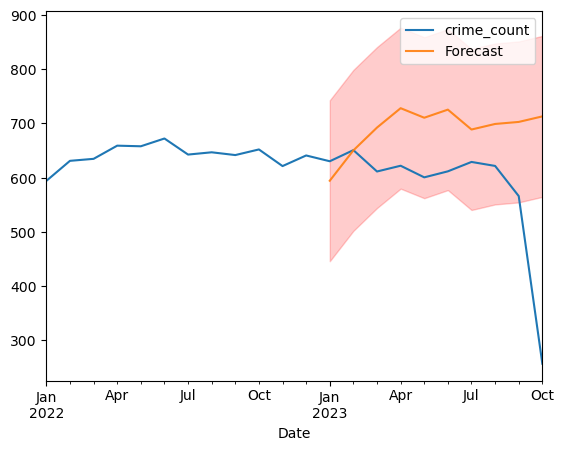

In [67]:
ax = monthly_crime_count['2022-01-01':].plot(kind='line')
prediction.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.9)
ax.fill_between(prediction_confidence_int.index,prediction_confidence_int.iloc[:,0],
               prediction_confidence_int.iloc[:,1],color='r', alpha= 0.2)
ax.legend()

In [68]:
#RMSE
y_pred = prediction.predicted_mean
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root mean squared error of SARIMAX model is:",rmse)

Root mean squared error of SARIMAX model is: 167.40608609001868


In [69]:
# Future forecast
pred = model.get_forecast(steps=24)
pred_conf = pred.conf_int()

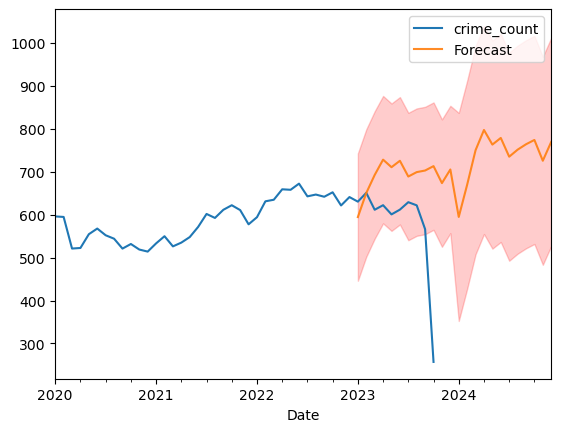

In [70]:
ax = monthly_crime_count.plot(kind='line')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.9)
ax.fill_between(pred_conf.index,pred_conf.iloc[:,0],
               pred_conf.iloc[:,1],color='r', alpha= 0.2)
ax.legend()